In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # pip install statsmodels
import numpy as np

## Task 1

In [33]:
def draw_line_plots(all_series_titles):
    """
    all_series_titles; [(series1, title1), (series2, title2), ...]
    plot in 2 columns
    """
    n = len(all_series_titles)
    n_rows = n // 2 + n % 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(25, 10 * n_rows))
    for i, (series, title) in enumerate(all_series_titles):
        ax = axs[i // 2, i % 2]
        series.plot(ax=ax)
        ax.set_title(title)
    

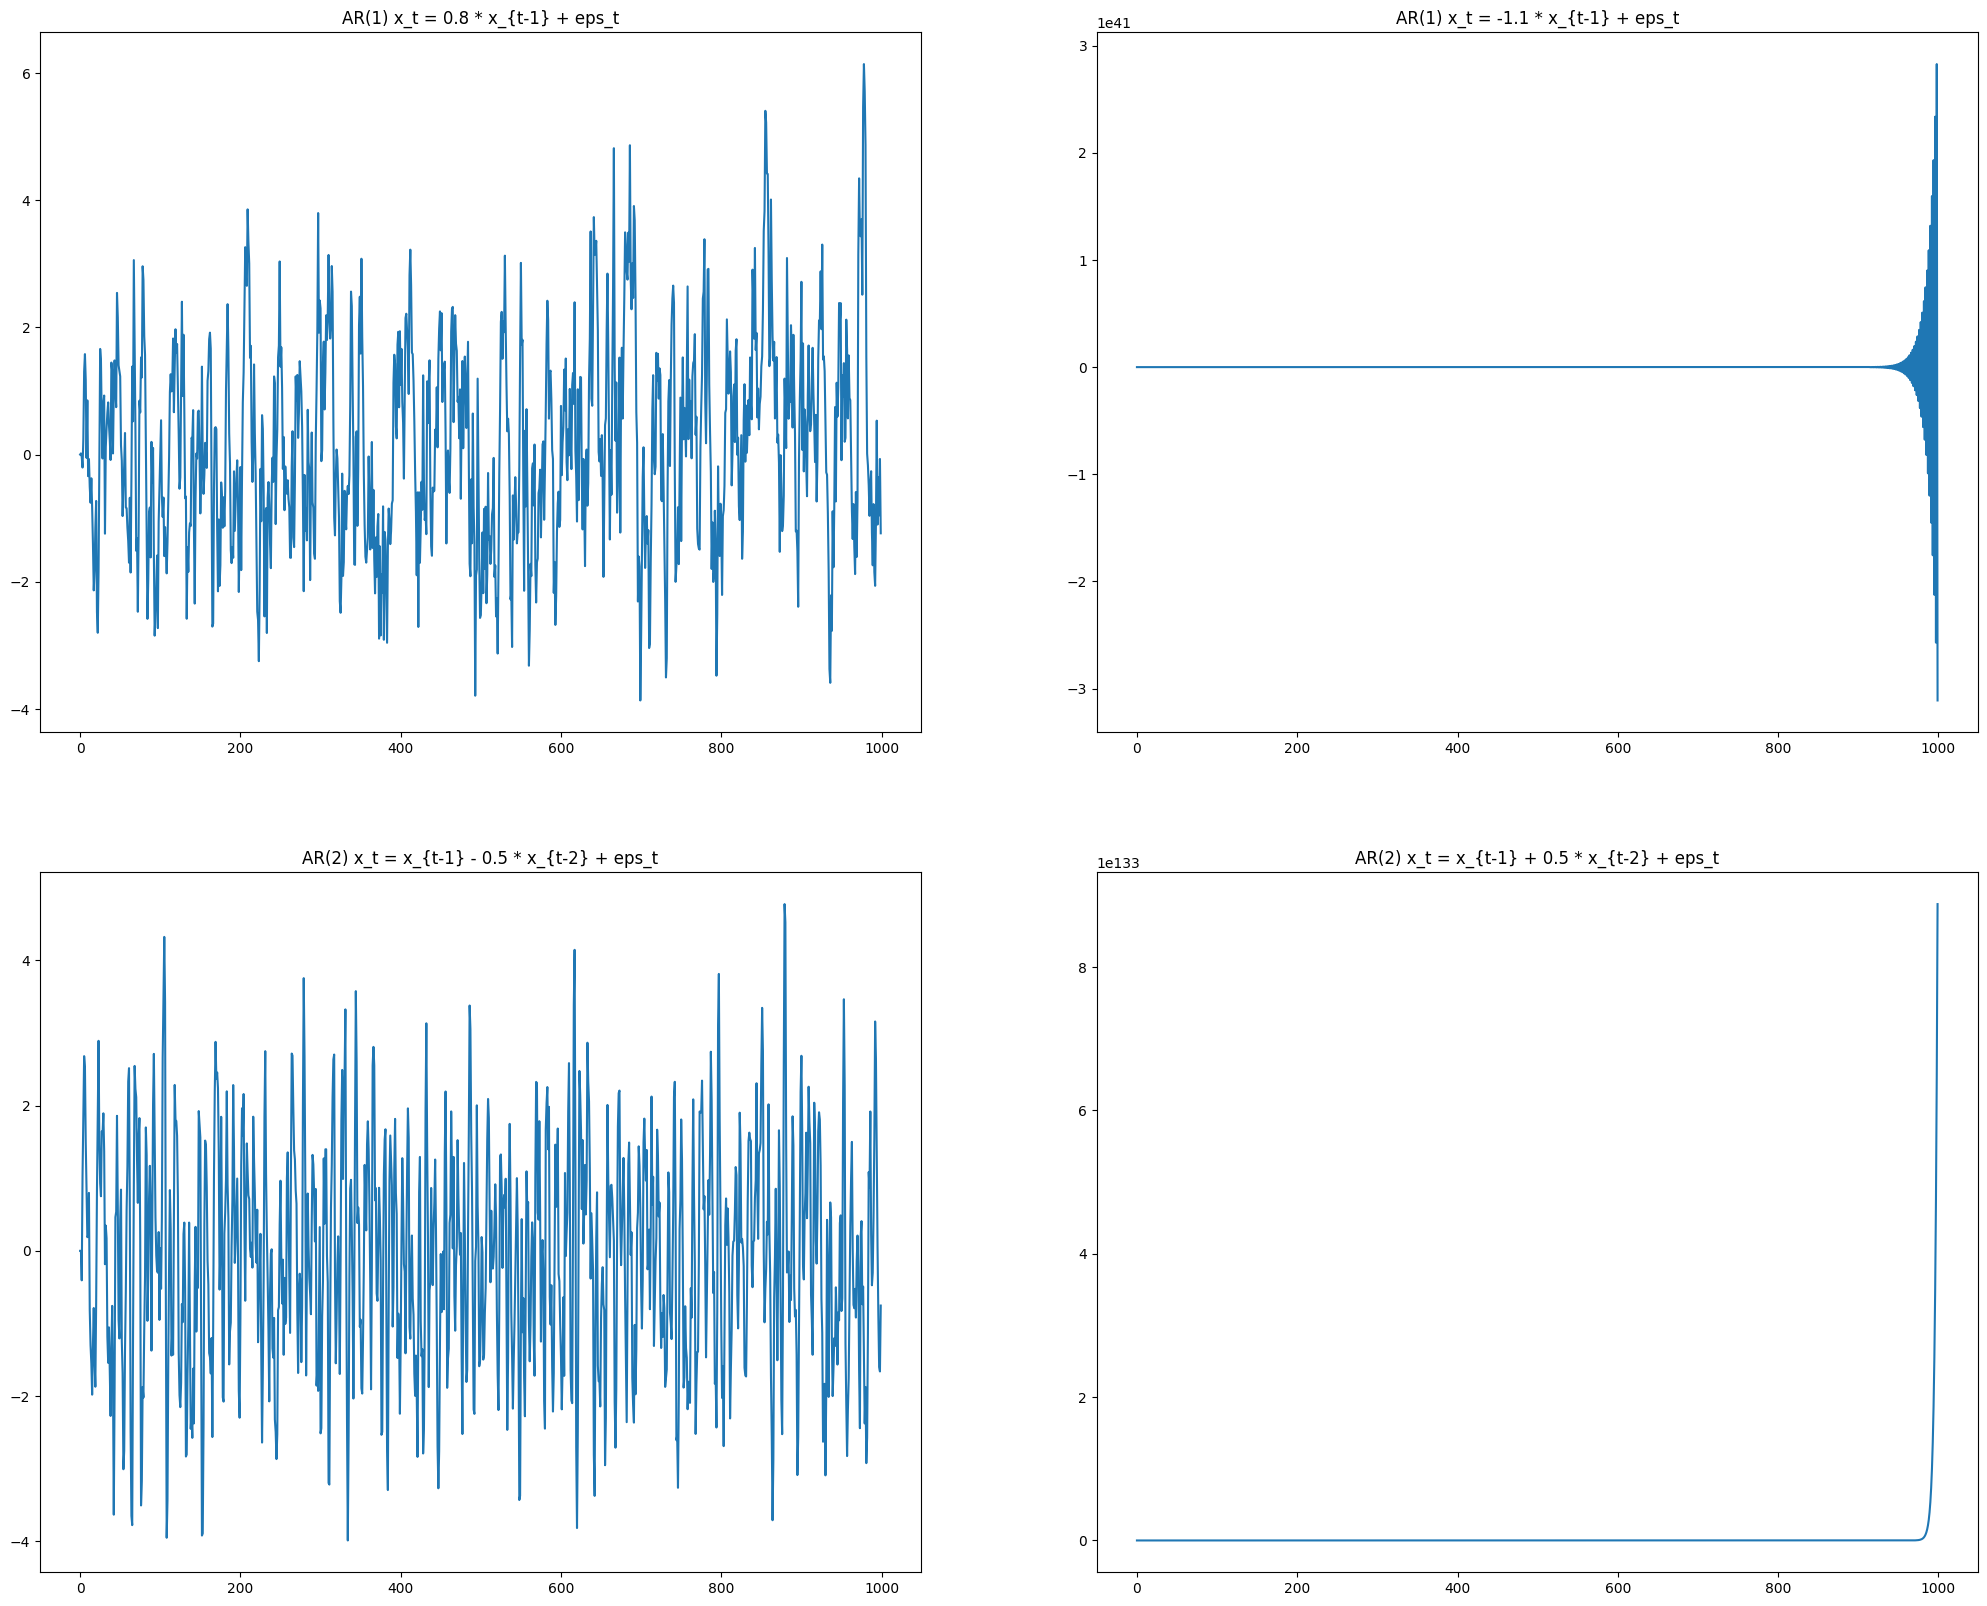

In [34]:

#series 1: AR(1) x_t = 0.8 * x_{t-1} + eps_t
#series 2: AR(1) x_t = -1.1 * x_{t-1} + eps_t
#series 3: AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t
#series 4: AR(2) x_t = x_{t-1} + 0.5 * x_{t-2} + eps_t
#eps_t ~ N(0, 1)
series1 = [0]
for i in range(1, 1000):
    series1.append(0.8 * series1[i-1] + np.random.normal(0, 1))
series1 = pd.Series(series1)


#series 2: AR(1) x_t = -1.1 * x_{t-1} + eps_t
series2 = [0]
for i in range(1, 1000):
    series2.append(-1.1 * series2[i-1] + np.random.normal(0, 1))
series2 = pd.Series(series2)

#series 3: AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t
series3 = [0, 0]
for i in range(2, 1000):
    series3.append(series3[i-1] - 0.5 * series3[i-2] + np.random.normal(0, 1))
series3 = pd.Series(series3)

#series 4: AR(2) x_t = x_{t-1} + 0.5 * x_{t-2} + eps_t
series4 = [0, 0]
for i in range(2, 1000):
    series4.append(series4[i-1] + 0.5 * series4[i-2] + np.random.normal(0, 1))
series4 = pd.Series(series4)


draw_line_plots([(series1, "AR(1) x_t = 0.8 * x_{t-1} + eps_t"), (series2, "AR(1) x_t = -1.1 * x_{t-1} + eps_t"), (series3, "AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t"), (series4, "AR(2) x_t = x_{t-1} + 0.5 * x_{t-2} + eps_t")])


visually
1. Stationary
2. Not stationary
3. Stationary
4. Not stationary

In [35]:
def draw_plots(data, title):
    """ 
    Histogram, density plot, Box-plot
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    data.plot.hist(ax=axs[0], bins=50)
    data.plot.kde(ax=axs[1])
    data.plot.box(ax=axs[2])
    axs[0].set_title(title)
    axs[1].set_title(title)
    axs[2].set_title(title)
    plt.show()
    
# draw_plots(series1, "AR(1) x_t = 0.8 * x_{t-1} + eps_t")
# draw_plots(series2, "AR(1) x_t = -1.1 * x_{t-1} + eps_t")
# draw_plots(series3, "AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t")
# draw_plots(series4, "AR(2) x_t = x_{t-1} + 0.5 * x_{t-2} + eps_t")

Are there outliers?
Yes, all the dots in the box plot.

Judge whether it is stationary or not by its model's auto-regressive coefficient value

1. series 1: AR(1) x_t = 0.8 * x_{t-1} + eps_t
2. series 2: AR(1) x_t = -1.1 * x_{t-1} + eps_t
3. series 3: AR(2) x_t = x_{t-1} - 0.5 * x_{t-2} + eps_t
4. series 4: AR(2) x_t = x_{t-1} + 0.5 * x_{t-2} + eps_t


Determine if the series is stationary based on its model's auto-regressive coefficient values
- Series 1:$p=1$ and $-1\lt\phi_1=0.8\lt 1$ and $c=0$ --> non-stationary
- Series 2: $p=1$ and $\phi_1=-1.1 \lt -1$ and $c=0$ --> non-stationary
- Series 3: $p=2$ and $\phi_1 +\phi_2 < 1$ and thus it is stationary
- Series 4:  $p=2$ and $\phi_1 +\phi_2 > 1$ and thus it is non-stationary


In [40]:
arparams1 = np.array([0.8])
arparams2 = np.array([-1.1])
arparams3 = np.array([1, -0.5])
arparams4 = np.array([1, 0.5])
arparams1 = np.r_[1, -arparams1]
arparams2 = np.r_[1, -arparams2]
arparams3 = np.r_[1, -arparams3]
arparams4 = np.r_[1, -arparams4]

# maparams = np.array([0])

arma_process1 = sm.tsa.ArmaProcess(arparams1)
arma_process2 = sm.tsa.ArmaProcess(arparams2)
arma_process3 = sm.tsa.ArmaProcess(arparams3)
arma_process4 = sm.tsa.ArmaProcess(arparams4)

print("Model 1 is stationary? ", arma_process1.isstationary)
print("Model 2 is stationary? ", arma_process2.isstationary)
print("Model 3 is stationary? ", arma_process3.isstationary)
print("Model 4 is stationary? ", arma_process4.isstationary)

Model 1 is stationary?  True
Model 2 is stationary?  False
Model 3 is stationary?  True
Model 4 is stationary?  False


In [37]:
# Using the unit root based ADF to check if the series generated by the AR models are stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=""):
    result = adfuller(series, autolag='AIC') # AIC is the Akaike Information Criterion, it is used to determine the lag value
    print(f"Augmented Dickey-Fuller Test: {title} p-value: {result[1]}")
    # print("Critial Values:")
    # for key, value in result[4].items():
    #     print(f"    {key}, {value}")
        

adf_test(series1, "1")
adf_test(series2, "2")
adf_test(series3, "3")
adf_test(series4, "4")

Augmented Dickey-Fuller Test: 1 p-value: 1.4811673763172147e-20
Augmented Dickey-Fuller Test: 2 p-value: 0.0
Augmented Dickey-Fuller Test: 3 p-value: 0.0
Augmented Dickey-Fuller Test: 4 p-value: 1.0


All series have p-values < 0.05 except for series 4.

All series are stationary except series 4.